# Data Cleaning - Aggregate of Rural Electricty over years

In [21]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy.stats import linregress

data_to_load = Path("Resources/internet_adoption_rates_of_change.csv")

internet_adoption_data = pd.read_csv(data_to_load)

# Replace 'inf' with NaN and drop rows with NaN 
internet_data_clean = internet_adoption_data.replace([np.inf, -np.inf], np.nan).dropna()

internet_data_clean

,Country,Year,Population (millions),Rate of Change (%) - Broadband,Rate of Change (%) - Mobile,Rural electricity access (%)
0,Algeria,2018,41.3,23.47,6.62,96.87
1,Algeria,2019,42.1,10.07,-4.48,96.87
2,Algeria,2020,42.9,-6.44,0.81,100.00
3,Algeria,2021,43.7,14.60,-2.06,96.70
4,Angola,2018,29.8,-47.27,-9.44,5.55
...,...,...,...,...,...,...
473,Zambia,2021,18.4,19.05,8.07,6.30
474,Zimbabwe,2018,14.2,2.52,-0.54,11.00
475,Zimbabwe,2019,14.4,8.20,7.84,11.00
476,Zimbabwe,2020,14.6,6.82,-9.70,11.50


## Data Cleaning

In [8]:
#keep the original column but drop the duplicates
country = internet_data_clean['Country'].unique()
country

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia',
       'Congo (DRC)', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France',
       'Gabon', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea',
       'Honduras', 'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos', 'Latvia', 'Lebanon',
       'Liberia', 'Lithuania', 'Madagascar', 'Malawi', 'Malaysia', 'Mali',
       'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
       'Niger', 'Nigeria',

In [9]:
# Calculate the total mean for each country for broadband
clean_broadband = internet_data_clean.groupby('Country')['Rate of Change (%) - Broadband'].mean()
clean_broadband

Country
Algeria       10.4250
Angola        -5.4025
Argentina      5.4050
Australia      5.0500
Austria       -0.1350
               ...   
Uzbekistan    25.5100
Venezuela      1.0625
Vietnam       16.8175
Zambia        39.0625
Zimbabwe       4.2075
Name: Rate of Change (%) - Broadband, Length: 120, dtype: float64

In [10]:
# Calculate the total mean for each country for mobile
clean_mobile = internet_data_clean.groupby('Country')['Rate of Change (%) - Mobile'].mean()
clean_mobile

Country
Algeria        0.2225
Angola        -1.4475
Argentina     -3.2050
Australia      0.6775
Austria       -5.9700
               ...   
Uzbekistan    10.8550
Venezuela    -15.5550
Vietnam        2.4175
Zambia         7.3475
Zimbabwe      -0.4050
Name: Rate of Change (%) - Mobile, Length: 120, dtype: float64

In [11]:
# Calculate the total mean for each country for rural electricity
clean_elec = internet_data_clean.groupby('Country')['Rural electricity access (%)'].mean()
clean_elec

Country
Algeria        97.6100
Angola          5.9250
Argentina      85.1875
Australia     100.0000
Austria       100.0000
                ...   
Uzbekistan    100.0000
Venezuela      98.7700
Vietnam        98.7875
Zambia          5.7600
Zimbabwe       17.4250
Name: Rural electricity access (%), Length: 120, dtype: float64

## Data Summary

In [12]:
# Combine each of the scores above into single DataFrame called `math_scores_by_grade`
internet_summary = pd.DataFrame(
    {
        "Country" : country,
        "RoC (%) Broadband" : clean_broadband,
        "RoC (%) Mobile" : clean_mobile,
        "Rural electricity access (%)" : clean_elec
    }
)

# Minor data wrangling
internet_summary.index.name = None

# Minor data cleaning
internet_summary["RoC (%) Broadband"] = internet_summary["RoC (%) Broadband"].map("{:,.2f}".format)
internet_summary["RoC (%) Mobile"] = internet_summary["RoC (%) Mobile"].map("{:,.2f}".format)
internet_summary["Rural electricity access (%)"] = internet_summary["Rural electricity access (%)"].map("{:,.2f}".format)

#export to CSV
internet_summary.to_csv("Resources/internet_summary.csv")

# Display the DataFrame
internet_summary

,Country,RoC (%) Broadband,RoC (%) Mobile,Rural electricity access (%)
Algeria,Algeria,10.43,0.22,97.61
Angola,Angola,-5.40,-1.45,5.92
Argentina,Argentina,5.41,-3.21,85.19
Australia,Australia,5.05,0.68,100.00
Austria,Austria,-0.14,-5.97,100.00
...,...,...,...,...
Uzbekistan,Uzbekistan,25.51,10.86,100.00
Venezuela,Venezuela,1.06,-15.55,98.77
Vietnam,Vietnam,16.82,2.42,98.79
Zambia,Zambia,39.06,7.35,5.76


## Broadband V. Rural Electricity 

In [33]:
# Define a function to create Linear Regression plots
def regression_line(arg1, arg2):
    slope, intercept, r_value, p_value, std_err = linregress(arg1, arg2)
    line = slope * arg1 + intercept
    equation_text = f"y = {round(slope,2)}x + {round(intercept,2)}"
    return line, r_value, round(slope,2), round(intercept,2), equation_text

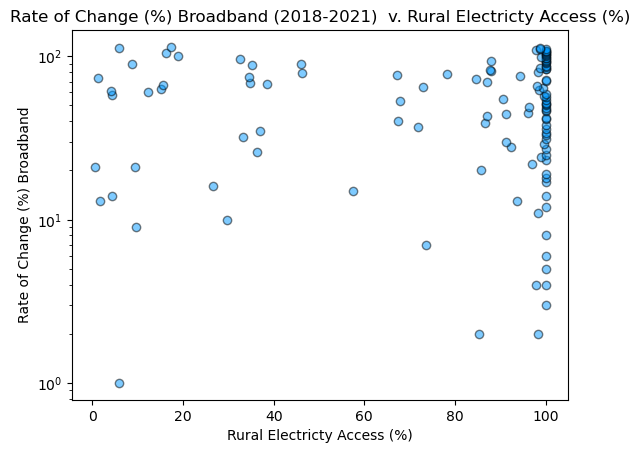

In [54]:
# Linear regression on Broadband V. Rural Electricity
#Data Setup
broadband_change = internet_summary['RoC (%) Broadband']
rural_electricity = internet_summary['Rural electricity access (%)']
#nh_reg_line, r_value, slope, intercept, equation_text = regression_line(broadband_change, rural_electricity)
alpha_value = .5

# Print the r value
#print(f"The r-value is: {r_value**2}.")

# Plot and Regression Line
plt.scatter(rural_electricity, broadband_change, alpha=alpha_value, color='#0099FF', edgecolors='black')
#plt.plot(broadband, nh_reg_line, color='#FF0000')
#plt.text(2, -25, equation_text, fontsize=15, color='#FF0000')

#new_y_scale = 50  # Set your desired interval between tick marks
#new_y_min = -30
#new_y_max = 1200
#plt.ylim(new_y_min, new_y_max)
#plt.yticks(range(new_y_min, new_y_max + 1, new_y_scale))


# Label
plt.title("Rate of Change (%) Broadband (2018-2021)  v. Rural Electricty Access (%)")
plt.ylabel("Rate of Change (%) Broadband")
plt.yscale('log')
plt.xlabel("Rural Electricty Access (%)")
plt.grid(False)
  
#Cleanup
plt.show()

## Crazy Idea

In [14]:
lat_lon_path = "Resources/Country_Lat_Lon.csv"
internet_summary_path = "Resources/internet_summary.csv"

# Read the mouse data and the study results
lat_lon = pd.read_csv(lat_lon_path)
internet_summary = pd.read_csv(internet_summary_path)

summary_merge = pd.merge(lat_lon, internet_summary, how="left")

summary_merge

,Country,Lat,Lng,Unnamed: 0,RoC (%) Broadband,RoC (%) Mobile,Rural electricity access (%)
0,Algeria,28.0000,3.0000,Algeria,10.43,0.22,97.61
1,Angola,-12.5000,18.5000,Angola,-5.40,-1.45,5.92
2,Argentina,-34.0000,-64.0000,Argentina,5.41,-3.21,85.19
3,Australia,-25.0000,135.0000,Australia,5.05,0.68,100.00
4,Austria,47.3333,13.3333,Austria,-0.14,-5.97,100.00
...,...,...,...,...,...,...,...
111,Uzbekistan,41.7075,63.8491,Uzbekistan,25.51,10.86,100.00
112,Venezuela,8.0000,-66.0000,Venezuela,1.06,-15.55,98.77
113,Vietnam,16.1667,107.8333,Vietnam,16.82,2.42,98.79
114,Zambia,-15.0000,30.0000,Zambia,39.06,7.35,5.76


In [25]:
fig = px.scatter_ternary(summary_merge, a='Lng',b='Lat',c='RoC (%) Broadband', color_continuous_scale="Viridis")
#fig.xlabel("Longitude")
#plt.ylabel("Latitude")
#clb.set_label("Rate of Change (%) Broadband")
fig.show()

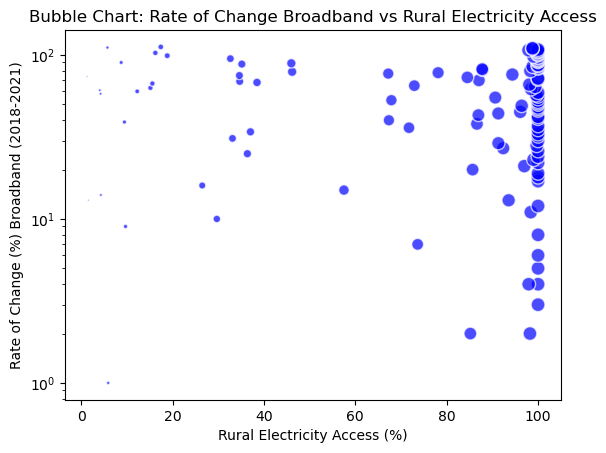

In [53]:
#bubble plot
plt.scatter(
    x=summary_merge['Rural electricity access (%)'],
    y=summary_merge['RoC (%) Broadband'],
    s=summary_merge['Rural electricity access (%)'],  # Replace 'Bubble Size' with the actual column name for bubble size
    alpha=0.7,
    c='blue',
    edgecolors='w',
    linewidth=1
)

# Add labels and title
plt.ylabel('Rate of Change (%) Broadband (2018-2021)')
plt.yscale('log')
plt.xlabel('Rural Electricity Access (%)')
plt.title('Bubble Chart: Rate of Change Broadband vs Rural Electricity Access')


# Show the plot
plt.show()


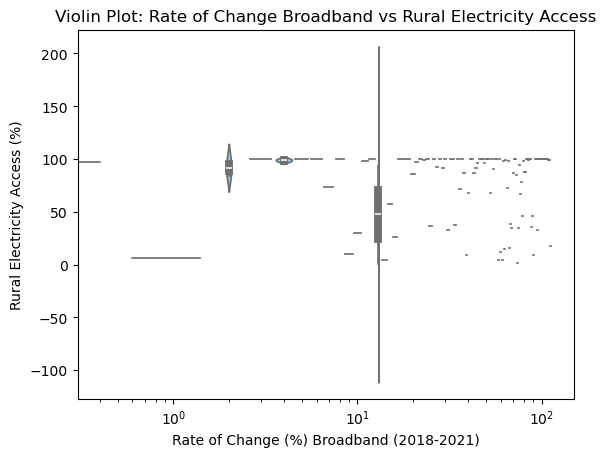

In [42]:
# Create a violin plot
sns.violinplot(x=summary_merge['RoC (%) Broadband'], y=summary_merge['Rural electricity access (%)'], color='skyblue')

# Add labels and title
plt.xlabel('Rate of Change (%) Broadband (2018-2021)')
plt.xscale('log')
plt.ylabel('Rural Electricity Access (%)')
plt.title('Violin Plot: Rate of Change Broadband vs Rural Electricity Access')

# Show the plot
plt.show()